In [1]:
from sklearn.preprocessing import MinMaxScaler
'''
Dictionary with common occupations
"Other" option will ask a series of questions to determine the score for that occupation

Questions: (score is always less than 1.0)
1. Remote or not remote? (0 or 1)
    a. If not remote, how many people in contact with per week? (minmaxscaler)
2. Are you regularly exposed to individuals diagnosed with COVID-19? (0 or 1)

Weigted Average all 3 question scores
'''
occupations = {
    'Health Care Worker': 1.0,
    'First Responder': 0.9,
    'Corrections Workers': 0.9,
    'Food and Agriculture': 0.9,
    'Grocery Store Workers': 0.9,
    'Education': 0.9,
    'U.S. Postal Service Workers': 0.9,
    'Public Transit Workers': 0.9,
    'Manufacturing': 0.9,
    'Transportation and Logistics': 0.8,
    'Food Service': 0.8,
    'Energy': 0.8,
    'Water and Wastewater': 0.8,
    'Shelter and Housing': 0.8,
    'IT and Communication': 0.8,
    'News Media': 0.8,
    'Public Safety': 0.8,
    'Public Health Workers': 0.8,
    'Finance': 0.8,
    'Legal': 0.8,
    'Other': 0.0}
    
# Questions for the "Other" category

# Contact
while True:
    remote_question = input('Do you work in-person? [y/n] \n')
    if remote_question == 'n':
        contact = 0
        break
    elif remote_question == 'y':

        # Contact score for non-remote workers
        contact_question = input('How many people in contact with per week? (#)\n')
        num_contact = [[0],[100],[contact_question]]
        scaler = MinMaxScaler()
        x = scaler.fit(num_contact)
        contact = x.transform(num_contact)[-1]
        break
    else:
        print('Please retype your answer \n')

# Exposure
while True:
    exposure_question = input('Are you regularly exposed to individuals who are at risk for COVID-19? [y/n] \n')
    if exposure_question == 'y':
        exposure = 1
        break
    elif exposure_question == 'n':
        exposure = 0
        break
    else:
        print('Please retype your answer \n')


occupation_avg = 0.35 * contact + 0.65 * exposure
print(occupation_avg)

Do you work in-person? [y/n] 
y
How many people in contact with per week? (#)
15
Are you regularly exposed to individuals who are at risk for COVID-19? [y/n] 
n
[0.0525]


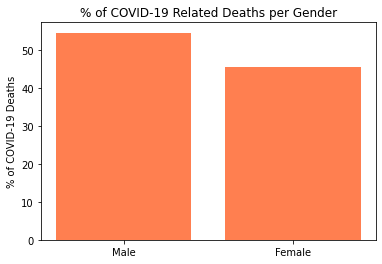

Sex
Male      54.519619
Female    45.480381
Name: % Deaths, dtype: float64

In [15]:
# Cleaning the Gender data
import pandas as pd
import matplotlib.pyplot as plt

# Import the csv file as a dataframe
df = pd.read_csv('Provisional_COVID-19_Death_Counts_by_Sex__Age__and_State.csv')

# Include only the Group, State, Sex, Age Group, and COVID-19 Deaths columns
df = df[['Group','State', 'Sex', 'Age Group', 'COVID-19 Deaths']]

# Include Male and Female (not All Sexes)
df = df[(df['Sex'] == 'Male') | (df['Sex'] == 'Female')]

# Include people from all age groups, the entire country, over all time
gender = df[(df['Age Group'] == 'All Ages') & (df['State'] == 'United States') & (df['Group'] == 'By Total')]

US_POP = 328.2e6

gender = gender.set_index('Sex')
gender['% Deaths'] = (gender['COVID-19 Deaths'] / gender['COVID-19 Deaths'].sum()) * 100

plt.bar(['Male', 'Female'], gender['% Deaths'] , color = 'coral')
plt.title('% of COVID-19 Related Deaths per Gender')
plt.ylabel('% of COVID-19 Deaths')
plt.show()

gender['% Deaths']

In [22]:
# Gender Questionnaire
gender_question = input('Please identify your gender [m/f]')
if gender_question == 'm' or gender_question == 'M':
    gender_score = gender['% Deaths']['Male']/100
    
elif gender_question == 'f' or gender_question == 'F':
    gender_score = gender['% Deaths']['Female']/100

print(gender_score)

Please identify your gender [m/f]M
0.5451961947080048
